In [1]:
from scipy.linalg import circulant
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import cvxpy as cvx

In [2]:
source_path = "isoPerimData.mat"
mat = scipy.io.loadmat(source_path)

L = mat['L'][0][0]
C = mat['C'][0][0]
a = mat['a'][0][0]
N = mat['N'][0][0]
F = mat['F']
y_fixed = mat['y_fixed']

In [3]:
x = np.linspace(0, a, N+1).transpose()
h = a / N

In [4]:
# Zadanie 1
y = cvx.Variable((N+1, 1))

arc_length = 0

constraints = []

# długość odcinków między punktami na krzywej
for i in range(N):
    arc_length += cvx.norm(cvx.vstack([h, y[i+1] - y[i]]))

c1 = arc_length <= L
constraints.append(c1)

# maksymalna krzywizna
for i in range(N-1):
    constraints.append(cvx.abs((y[i+2] - 2 * y[i+1] + y[i]) / (h*h)) <= C)

# punkty startowy i końcowy
constraints.append(y[0] == 0)
constraints.append(y[-1] == 0)

# zadane punkty
for fixed_idx in F.flatten():
    constraints.append(y[fixed_idx] == y_fixed[fixed_idx - 1])

# maksymalizacja
area = cvx.Maximize(cvx.sum(y) * h)

Area under curve = 0.33994141630573027


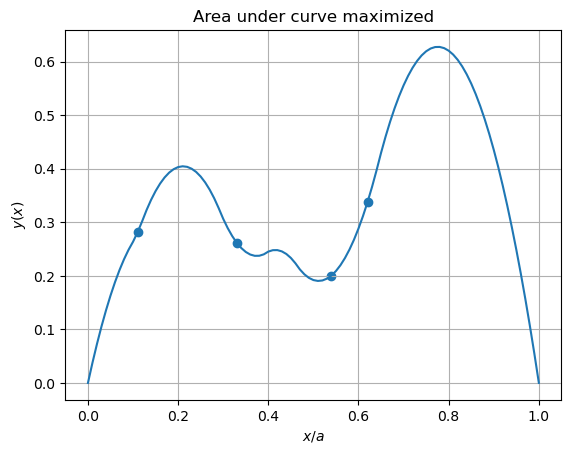

In [5]:
problem = cvx.Problem(area, constraints)
problem.solve(solver="ECOS")
print(f"Area under curve = {area.value}")
plt.plot(x, y.value)
plt.xlabel("$x/a$")
plt.ylabel("$y(x)$")
plt.title("Area under curve maximized")
plt.grid()
plt.scatter(x[F.flatten()], y_fixed[F.flatten() - 1])
plt.show()

In [6]:
# Zadanie 1 (a)
y = cvx.Variable((N+1, 1))

arc_length = 0

constraints = []

# długość odcinków między punktami na krzywej
for i in range(N):
    arc_length += cvx.norm(cvx.vstack([h, y[i+1] - y[i]]))

c1 = arc_length <= L
constraints.append(c1)

# maksymalna krzywizna
for i in range(N-1):
    constraints.append(cvx.abs((y[i+2] - 2 * y[i+1] + y[i]) / (h*h)) <= C)

# punkty startowy i końcowy
constraints.append(y[0] == 0)
constraints.append(y[-1] == 0)

# zadane punkty
for fixed_idx in F.flatten():
    constraints.append(y[fixed_idx] == y_fixed[fixed_idx - 1])

# minimalizacja
area = cvx.Minimize(cvx.sum(y) * h)

Area under curve = 0.17652468653909945


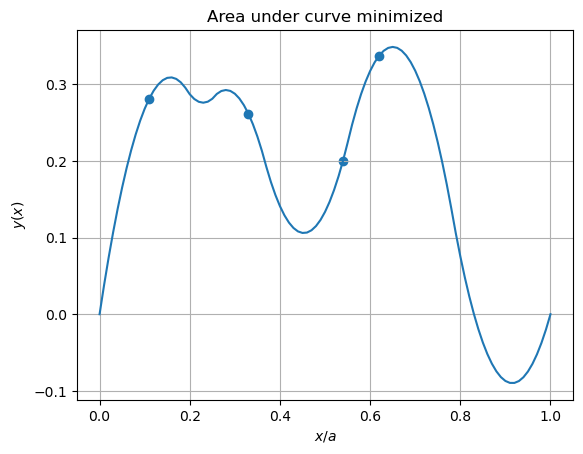

In [7]:
problem = cvx.Problem(area, constraints)
problem.solve(solver="ECOS")
print(f"Area under curve = {area.value}")
plt.plot(x, y.value)
plt.xlabel("$x/a$")
plt.ylabel("$y(x)$")
plt.title("Area under curve minimized")
plt.grid()
plt.scatter(x[F.flatten()], y_fixed[F.flatten() - 1])
plt.show()

In [8]:
# Zadanie 1 (b)
y = cvx.Variable((N+1, 1))

arc_length = 0

constraints = []

# długość odcinków między punktami na krzywej
for i in range(N):
    arc_length += cvx.norm(cvx.vstack([h, y[i+1] - y[i]]))

c1 = arc_length <= L
constraints.append(c1)

# maksymalna krzywizna
for i in range(N-1):
    constraints.append(cvx.abs((y[i+2] - 2 * y[i+1] + y[i]) / (h*h)) <= C)

# punkty startowy i końcowy
constraints.append(y[0] == 0)
constraints.append(y[-1] == 0)

# nieujemne zmienne optymalizacyjne
constraints.append(y >= 0)

# zadane punkty
for fixed_idx in F.flatten():
    constraints.append(y[fixed_idx] == y_fixed[fixed_idx - 1])

# minimalizacja
area = cvx.Minimize(cvx.sum(y) * h)

Area under curve = 0.18849731560010857


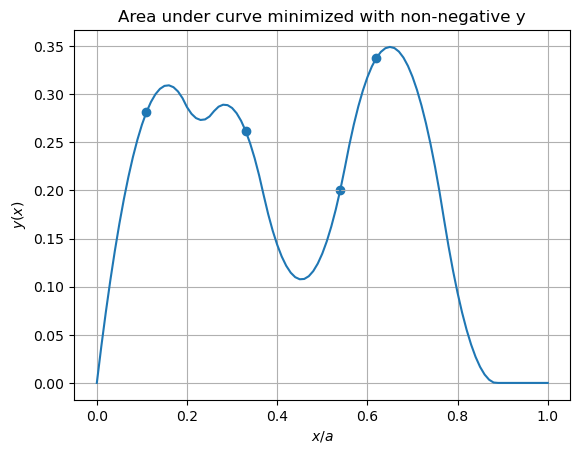

In [9]:
problem = cvx.Problem(area, constraints)
problem.solve(solver="ECOS")
print(f"Area under curve = {area.value}")
plt.plot(x, y.value)
plt.xlabel("$x/a$")
plt.ylabel("$y(x)$")
plt.title("Area under curve minimized with non-negative y")
plt.grid()
plt.scatter(x[F.flatten()], y_fixed[F.flatten() - 1])
plt.show()

In [14]:
# Zadanie 1 (c)
y = cvx.Variable((N+1, 1))

arc_length = 0

constraints = []

# długość odcinków między punktami na krzywej
for i in range(N):
    arc_length += cvx.norm(cvx.vstack([h, y[i+1] - y[i]]))

c1 = arc_length <= L
constraints.append(c1)

# punkty startowy i końcowy
constraints.append(y[0] == 0)
constraints.append(y[-1] == 0)

# zadane punkty
for fixed_idx in F.flatten():
    constraints.append(y[fixed_idx] == y_fixed[fixed_idx - 1])

# maksymalizacja
area = cvx.Maximize(cvx.sum(y) * h)

Area under curve = 0.5927511961422947


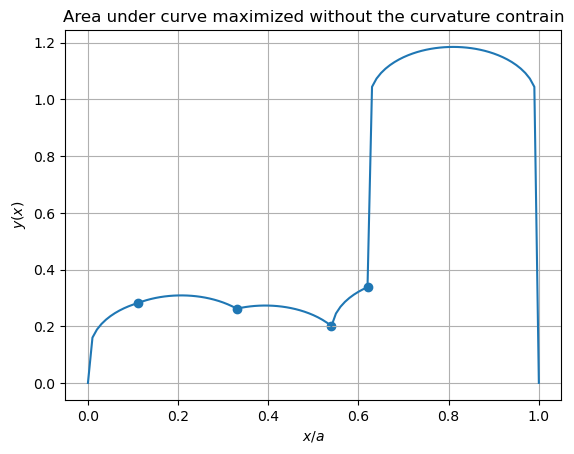

In [15]:
problem = cvx.Problem(area, constraints)
problem.solve(solver="ECOS")
print(f"Area under curve = {area.value}")
plt.plot(x, y.value)
plt.xlabel("$x/a$")
plt.ylabel("$y(x)$")
plt.title("Area under curve maximized without the curvature constrain")
plt.grid()
plt.scatter(x[F.flatten()], y_fixed[F.flatten() - 1])
plt.show()